<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [240]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import f1_score
import statsmodels.api as sm

This function is to plot the confusion matrix.


In [162]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 
    return ax

## Load the dataframe


Load the data


In [166]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [168]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [170]:

df_X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [172]:
df_X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [176]:
array_class = data.Class.to_numpy()
y = pd.Series(array_class)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [180]:
# students get this 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(df_X)


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

we can see we only have 18 test samples.


In [35]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [38]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [39]:
X.shape


(90, 83)

In [40]:
parameters

{'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

In [41]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs','liblinear']}# l1 lasso l2 ridge
lr=LogisticRegression(random_state=2)
logreg_cv = GridSearchCV(estimator=lr,param_grid=parameters,cv=10,verbose=5,scoring='roc_auc')
logreg_cv.fit(X_train,Y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.0s
[CV 2/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.867 total time=   0.0s
[CV 3/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 4/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.0s
[CV 5/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.0s
[CV 6/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.500 total time=   0.0s
[CV 7/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s
[CV 8/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.0s
[CV 9/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 10/10] END C=0.01, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.0s
[CV 1/10] END C=0.01, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 2/10] END C=0.01, penalty=l2, solver=libl

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=2),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='roc_auc', verbose=5)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [43]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8616666666666667


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


Parámetros del tercer mejor modelo: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


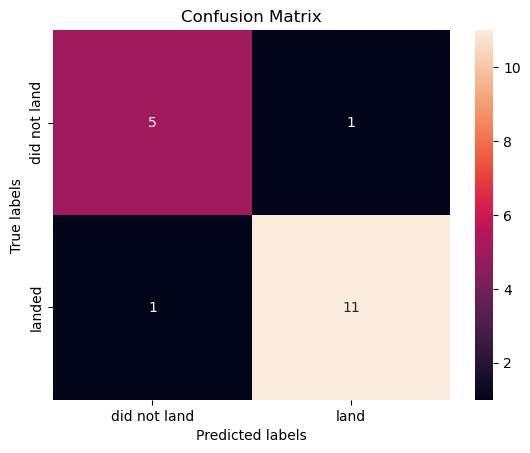

In [46]:
test_score_list = []
cross_validation_score = []
test_f1_score_list = []
model_list = []

cv_results_df = pd.DataFrame(logreg_cv.cv_results_)
cv_results_df = cv_results_df.sort_values(by='mean_test_score', ascending=False)
cv_results_df.reset_index()
third_best_params = cv_results_df.iloc[2]['params']
cross_validation_score.append(cv_results_df.iloc[2]['mean_test_score'])
print("Parámetros del tercer mejor modelo:", third_best_params)

# Crea y ajusta el modelo con estos parámetros en los datos de entrenamiento
third_best_model_lr = LogisticRegression(**third_best_params)
model_list.append('third_best_model_lr')
third_best_model_lr.fit(X_train, Y_train)
third_best_model_lr_score = third_best_model_lr.score(X_test,Y_test)
test_score_list.append(third_best_model_lr_score)
yhat=third_best_model_lr.predict(X_test)
third_best_model_lr_f1_score = f1_score(Y_test,yhat)
test_f1_score_list.append(third_best_model_lr_f1_score)
plot_confusion_matrix(Y_test,yhat)

Parámetros del segundo mejor modelo: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


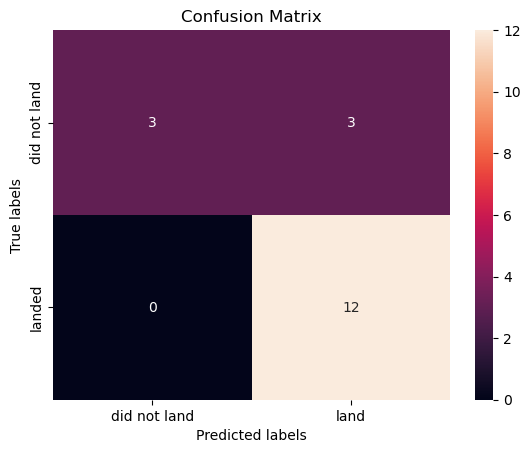

In [47]:
second_best_params = cv_results_df.iloc[1]['params']
cross_validation_score.append(cv_results_df.iloc[1]['mean_test_score'])
print("Parámetros del segundo mejor modelo:", second_best_params)

# Crea y ajusta el modelo con estos parámetros en los datos de entrenamiento
second_best_model_lr = LogisticRegression(**second_best_params)
model_list.append('second_best_model_lr')
second_best_model_lr.fit(X_train, Y_train)
test_score_list.append(second_best_model_lr.score(X_test,Y_test))
yhat=second_best_model_lr.predict(X_test)
test_f1_score_list.append(f1_score(Y_test,yhat))
plot_confusion_matrix(Y_test,yhat)

In [48]:
best_model_lr = logreg_cv.best_estimator_
cross_validation_score.append(cv_results_df.iloc[0]['mean_test_score'])
model_list.append('best_model_lr')
test_score_list.append(best_model_lr.score(X_test,Y_test))

Lets look at the confusion matrix:


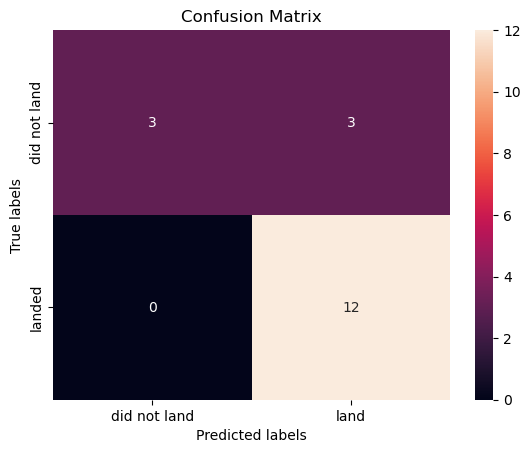

In [50]:
yhat=best_model_lr.predict(X_test)
test_f1_score_list.append(f1_score(Y_test,yhat))
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [54]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [55]:
svm_cv = GridSearchCV(estimator=svm,param_grid=parameters,verbose=5)
model_list.append('svm_cv')
svm_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.667 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.643 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.643 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 1/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.714 total time=   0.0s
[CV 1/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 2/5] END .C=0.001, gamma=0.001, kerne

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             verbose=5)

In [56]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
cross_validation_score.append(svm_cv.best_score_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.8342857142857142


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [59]:
best_model = svm_cv.best_estimator_
test_score_list.append(best_model.score(X_test,Y_test))

We can plot the confusion matrix


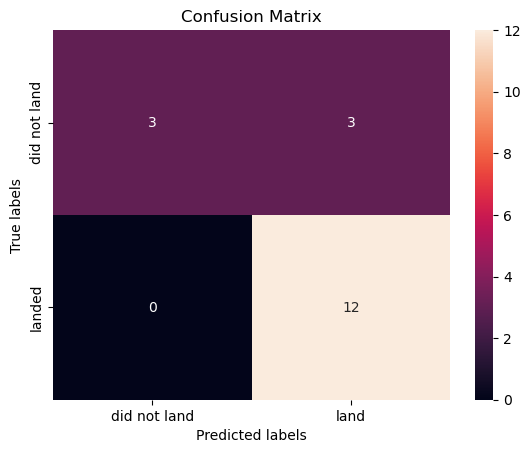

In [61]:
yhat=svm_cv.predict(X_test)
test_f1_score_list.append(f1_score(Y_test,yhat))
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [64]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [65]:
tree_cv = GridSearchCV(estimator=tree,param_grid=parameters,verbose=5)
model_list.append('tree_cv')
tree_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.800 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.857 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.429 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.857 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=5)

In [66]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
cross_validation_score.append(tree_cv.best_score_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8761904761904763


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [69]:
test_score_list.append(tree_cv.score(X_test,Y_test))

We can plot the confusion matrix


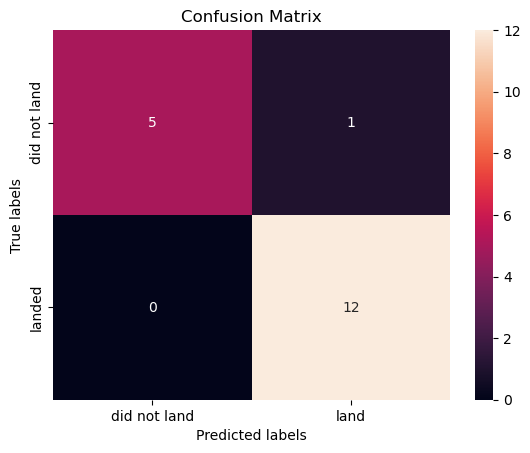

In [145]:
yhat = tree_cv.predict(X_test)
test_f1_score_list.append(f1_score(Y_test,yhat))
ax = plot_confusion_matrix(Y_test,yhat)
fig = ax.get_figure()
fig.savefig("confusion_matrix_tree.png")

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [74]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [75]:
knn_cv = GridSearchCV(estimator=KNN,param_grid=parameters,verbose=5)
model_list.append('knn_cv')
knn_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, p=1;, score=0.600 total time=   0.7s
[CV 2/5] END algorithm=auto, n_neighbors=1, p=1;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, p=1;, score=0.929 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, p=1;, score=0.786 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, p=1;, score=0.786 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=1, p=2;, score=0.733 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, p=2;, score=0.733 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, p=2;, score=0.857 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, p=2;, score=0.714 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, p=2;, score=0.786 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=2, p=1;, score=0.600 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=2, p=1

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             verbose=5)

In [76]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
cross_validation_score.append(knn_cv.best_score_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
accuracy : 0.8609523809523811


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [79]:
test_score_list.append(knn_cv.score(X_test,Y_test))

We can plot the confusion matrix


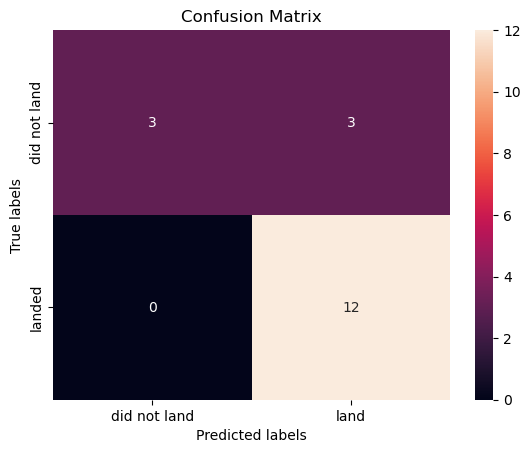

In [81]:
yhat = knn_cv.predict(X_test)
test_f1_score_list.append(f1_score(Y_test,yhat))
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [84]:
model_list

['third_best_model_lr',
 'second_best_model_lr',
 'best_model_lr',
 'svm_cv',
 'tree_cv',
 'knn_cv']

In [85]:
model_comparison_df = pd.DataFrame({'cross_validation_score':cross_validation_score,'test_score':test_score_list,'test_f1_score':test_f1_score_list},index=model_list)
model_comparison_df.to_csv('Results.csv')
model_comparison_df

,cross_validation_score,test_score,test_f1_score
third_best_model_lr,0.853333,0.888889,0.916667
second_best_model_lr,0.856667,0.833333,0.888889
best_model_lr,0.861667,0.833333,0.888889
svm_cv,0.834286,0.833333,0.888889
tree_cv,0.876190,0.944444,0.960000
knn_cv,0.860952,0.833333,0.888889


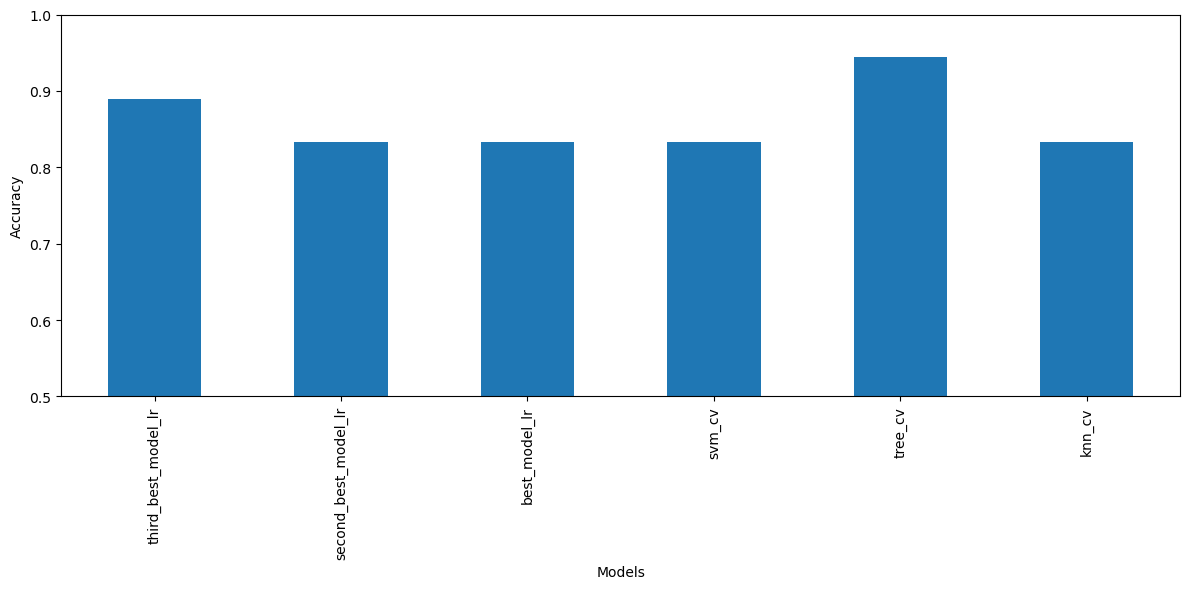

In [141]:
barchart_accuracy_comparison = model_comparison_df['test_score'].plot(figsize=(12,6),kind='bar')
plt.ylim(0.5, 1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.tight_layout()
fig = barchart_accuracy_comparison.get_figure()
fig.savefig(" barchart_accuracy_comparison.png")

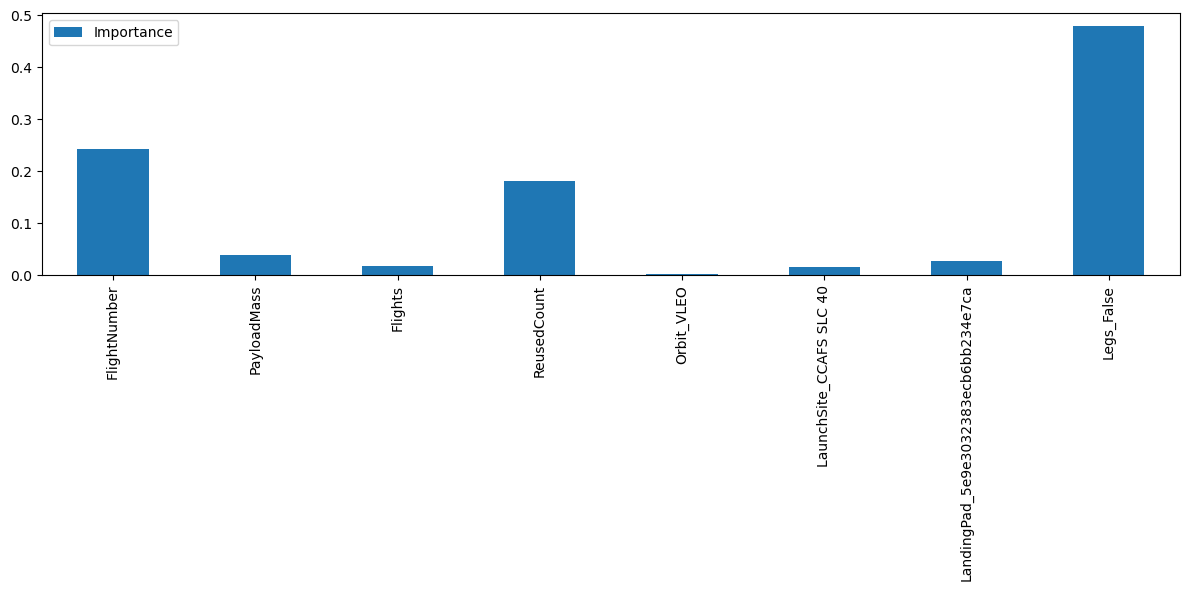

In [232]:
#Plotting more important features in Decision Model Classifier 
importances = tree_cv.best_estimator_.feature_importances_
features = df_X.columns
feature_importances = pd.DataFrame({
    'Importance': importances
},index=features)
bar_features_imprtance_tree = feature_importances[feature_importances['Importance']!=0].plot(kind='bar',figsize=(12,6))
plt.tight_layout()
fig = bar_features_imprtance_tree.get_figure()
fig.savefig("bar_features_importance_tree.png")

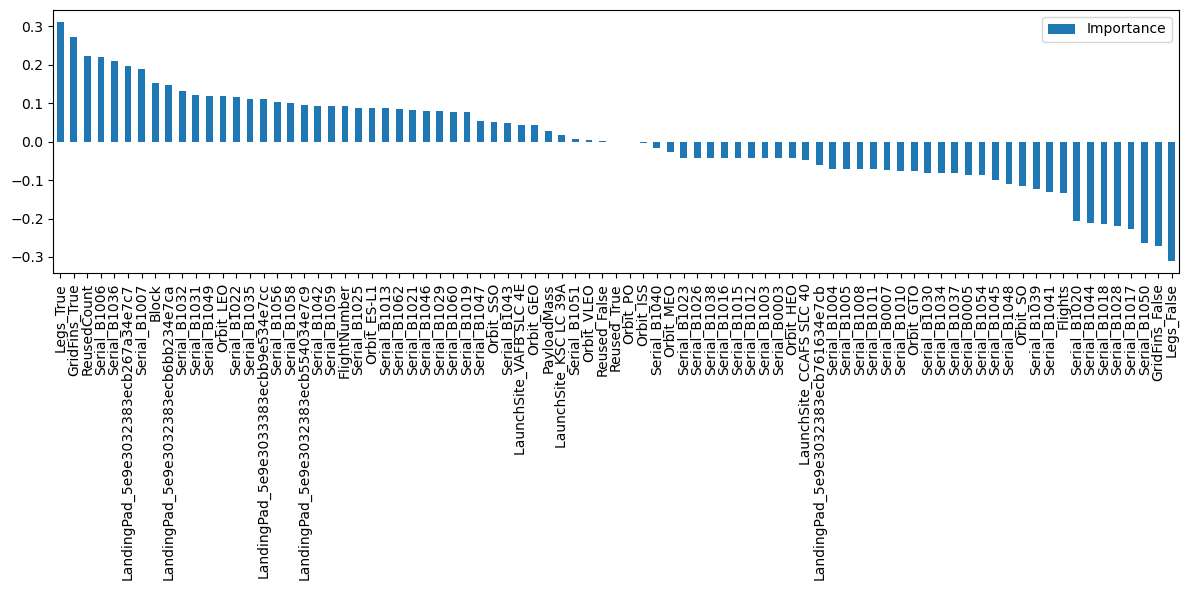

In [258]:
#Plotting more important features in best Logistic Regression model according test accuracy (third best model in Cross Validation).
importances = third_best_model_lr.coef_.reshape((83,))
features = df_X.columns
feature_importances = pd.DataFrame({
    'Importance': importances
},index=features)
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
bar_features_imprtance_lr = feature_importances.plot(kind='bar',figsize=(12,6))
plt.tight_layout()
fig = bar_features_imprtance_lr.get_figure()
fig.savefig("bar_features_importance_lr.png")

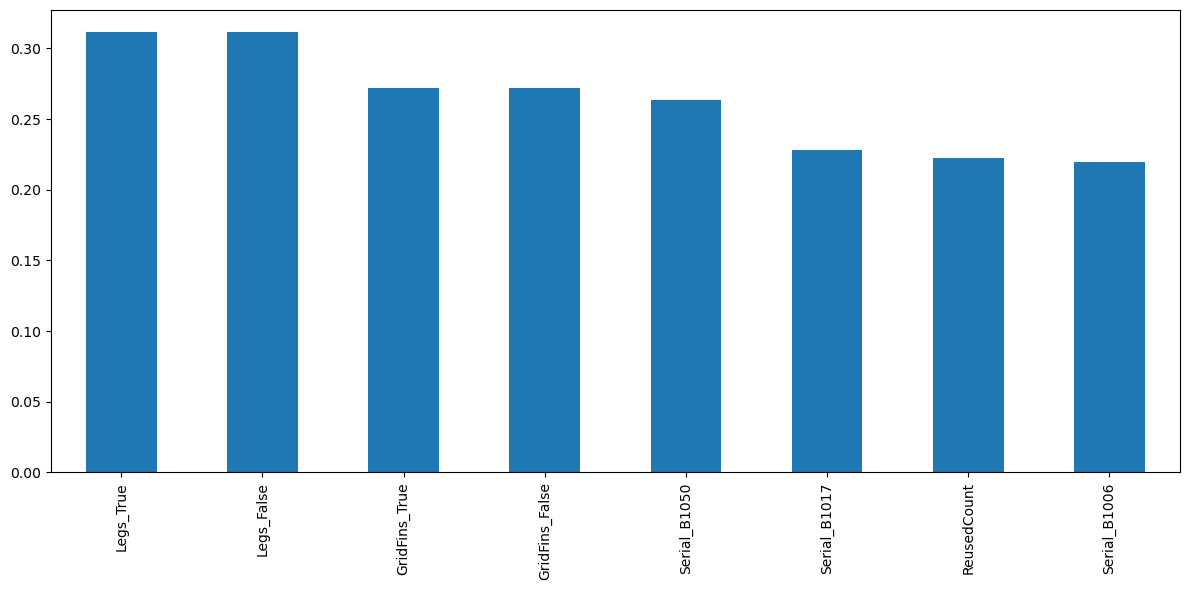

In [260]:
bar_ten_features_imprtance_lr = feature_importances.Importance.abs().sort_values(ascending=False).head(8).index
.plot(kind='bar',figsize=(12,6))

plt.tight_layout()
fig = bar_ten_features_imprtance_lr.get_figure()
fig.savefig("bar_ten_features_importance_lr.png")

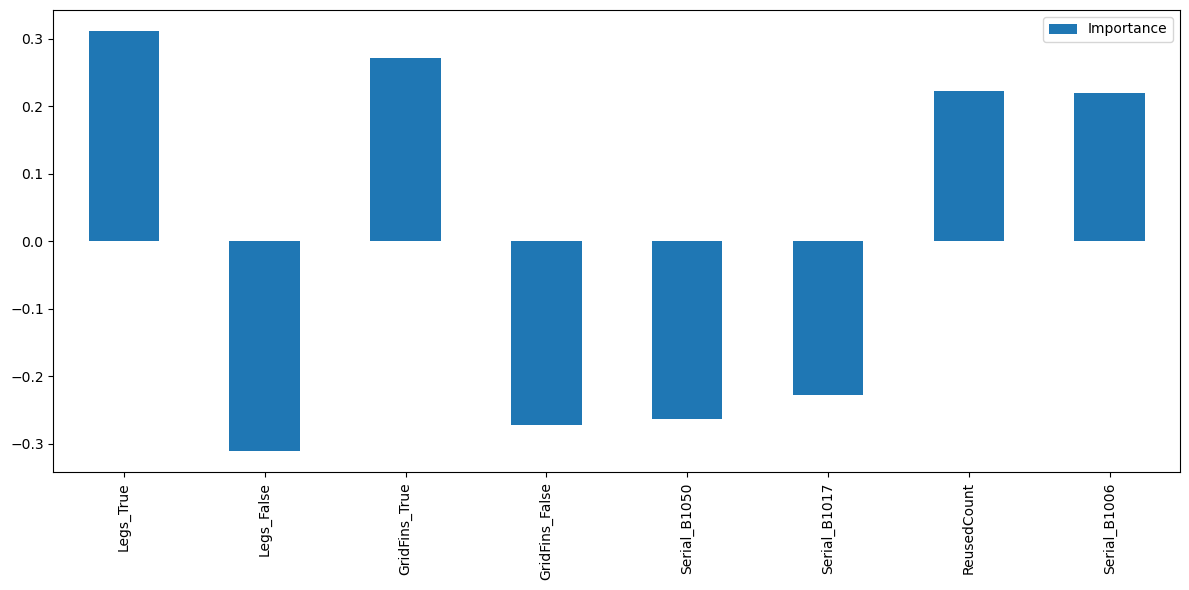

In [276]:
eight_features_importance_lr_index = feature_importances.Importance.abs().sort_values(ascending=False).head(8).index
eight_features_importance_lr = feature_importances.loc[eight_features_importance_lr_index][:]
bar_eight_features_importance_lr = eight_features_importance_lr.plot(kind='bar',figsize=(12,6))
plt.tight_layout()
fig = bar_eight_features_importance_lr.get_figure()
fig.savefig("bar_eight_features_importance_lr.png")

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
